# Session 4 : Supervised learning (3/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [2]:
%run new_dataset.py

## Support Vector Machine

### Toy dataset

In [3]:
# Create a dataset of 300 points with make_forge()
# and split it into a 270 points training set and 
# 30 points test set.
X, y = make_forge(300)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)
print("X_train has", len(X_train), "points and X_test has", len(X_test))

X_train has 270 points and X_test has 30


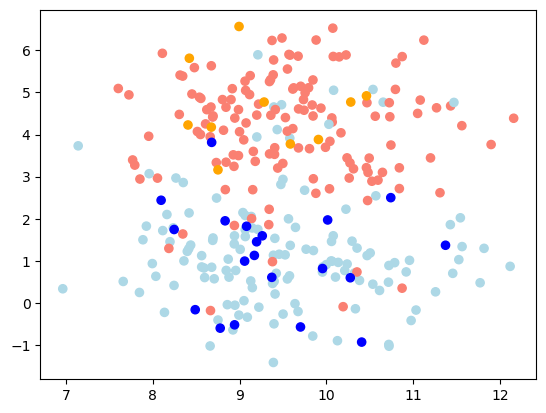

In [4]:
# Print the training points on a 2d figure. Points with
# class 1 should have the color 'salmon' and points with
# the class 0 should have the color 'lightblue'.

# YOUR CODE HERE
import numpy as np
train_points = np.where(y_train == 1, "salmon", "lightblue")
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=train_points, s=35)

# Print the test points on the same figure with color
# 'orange' for class 1 and 'blue' for class 0.
# YOUR CODE HERE
test_points = np.where(y_test == 1, "orange", "blue")
plt.scatter(X_test[:,0], X_test[:,1], c=test_points, s=35)
plt.show()

Accuracy of linear SVM = 0.9333333333333333
Class 0: 47 support vectors
Class 1: 47 support vectors


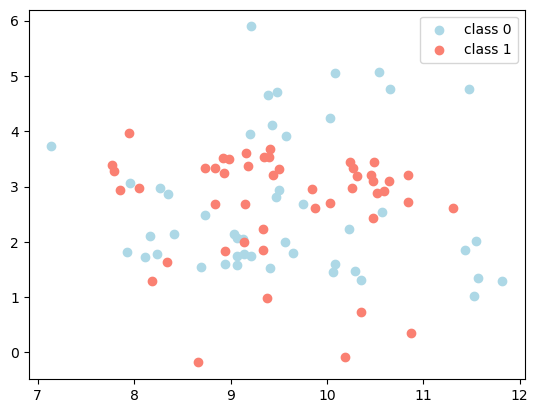

In [5]:
from sklearn.svm import SVC

# Create a SVM model for classification with a linear kernel
svm_model = SVC(kernel="linear")

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
accuracy_svm = svm_model.score(X_test, y_test)
print("Accuracy of linear SVM =", accuracy_svm)

# Determine the number of support vectors found for each class
print("Class 0:", svm_model.n_support_[0], "support vectors")
print("Class 1:", svm_model.n_support_[1], "support vectors")

# Plot the support vectors
plt.scatter(svm_model.support_vectors_[:svm_model.n_support_[1], 0],svm_model.support_vectors_[:svm_model.n_support_[1], 1],
            c="lightblue", label="class 0")
plt.scatter(svm_model.support_vectors_[svm_model.n_support_[1]:, 0],svm_model.support_vectors_[svm_model.n_support_[1]:, 1],
            c="salmon", label="class 1")
plt.legend()
plt.show()


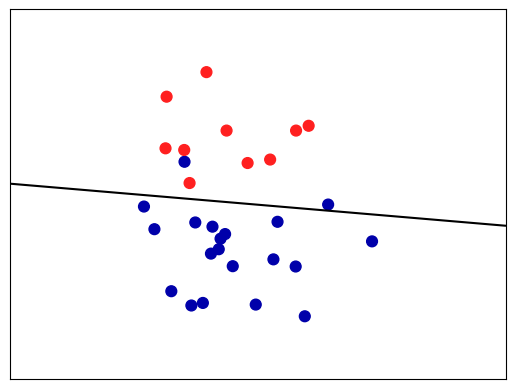

2/30 misclassified points


In [6]:
%run plots.py

# Visualize the decision boundary of your SVM. How many 
# points are misclassified ? Is your dataset linearly 
# separable ? Do you think it would be possible to improve 
# the accuracy of the model ? Explain why.

# Utilize the plot_2d_separator function to visualize the decision boundary
plot_2d_separator(svm_model, X_test, y_test)

# Show the plot
plt.show()

# Calculate the number of misclassified points
n_misclassified = sum(svm_model.predict(X_test) != y_test)
print("{}/{} misclassified points".format(n_misclassified, len(X_test)))

#answer:
#The dataset presents a non-linear separation challenge, as a straight line cannot effectively distinguish between the red and blue points.
#There is room for improvement, as a slight adjustment in the decision boundary could lead to better accuracy by minimizing misclassifications.
#Exploring alternative decision boundaries or employing non-linear classifiers might enhance the model's performance on this dataset.


Model (C=100):
  Train accuracy = 0.8888888888888888
  Test  accuracy = 0.9333333333333333


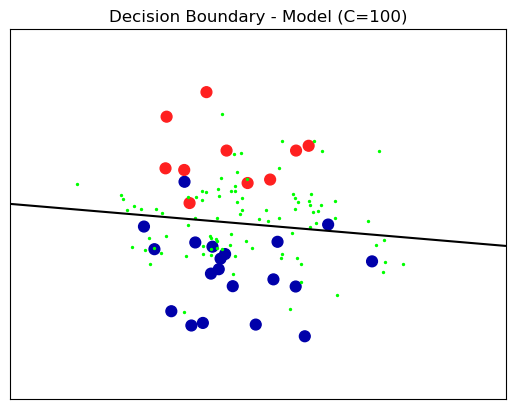

Model (C=10):
  Train accuracy = 0.8888888888888888
  Test  accuracy = 0.9333333333333333


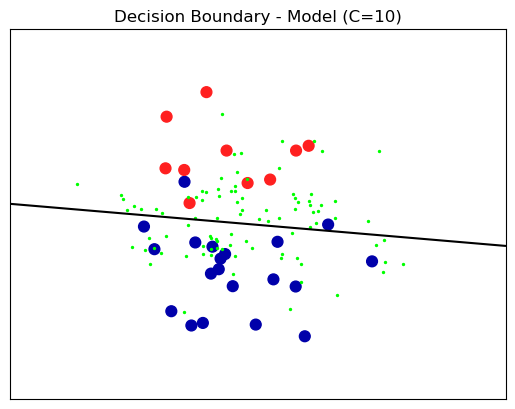

Model (C=0.1):
  Train accuracy = 0.8888888888888888
  Test  accuracy = 0.9333333333333333


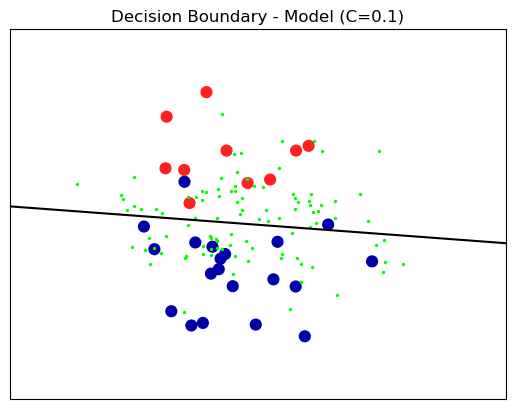

Model (C=0.01):
  Train accuracy = 0.8814814814814815
  Test  accuracy = 0.9666666666666667


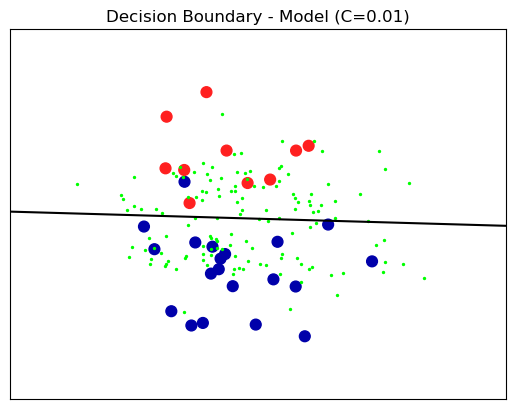

Model (C=0.001):
  Train accuracy = 0.8851851851851852
  Test  accuracy = 0.9666666666666667


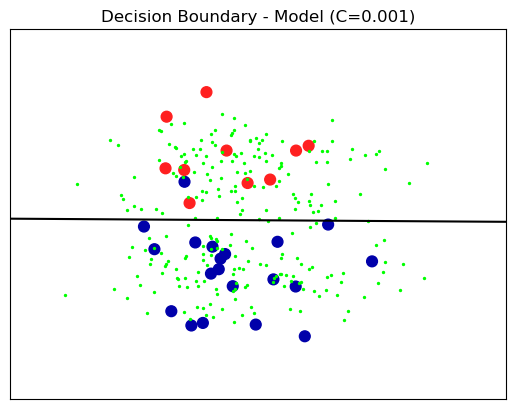

In [8]:
# Train 5 other SVM with modified values for the penalty
# and plot the decision boundary for each one.
# Explain the effect of this parameter (what happens if we 
# increase/decrease it ?)
# Do you think it can help prevent underfitting or 
# overfitting ?

def train_and_plot_svm(C, X_train, y_train, X_test, y_test, kernel="linear"):
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)

    print(f"Model (C={C}):")
    print("  Train accuracy =", model.score(X_train, y_train))
    print("  Test  accuracy =", model.score(X_test, y_test))

    plot_2d_separator(model, X_test, y_test)
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1], c="lime", s=2)
    plt.title(f"Decision Boundary - Model (C={C})")
    plt.show()

# Train and plot SVM models
C_values = [100, 10, 0.1, 0.01, 0.001]
for C in C_values:
    train_and_plot_svm(C, X_train, y_train, X_test, y_test, kernel="linear")
    
#answer : 
#High C: Emphasizes accurate classification over a large margin, potentially leading to overfitting.

#Low C: Prioritizes a larger margin, tolerating more errors and reducing the risk of overfitting but increasing the chance of underfitting.


### Real case dataset

In [19]:
# load the breast cancer dataset and train a linear SVC
# model on this dataset. You can create several models and
# adjust the value of the penalty parameter to find the
# optimal one. Can you get a better accuracy than the KNN
# model (it was 0.923?)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=5)

model_breast = SVC(kernel="linear", C=10, random_state=5)
model_breast.fit(X_train, y_train)
print("Train accuracy is:", model_breast.score(X_train, y_train))
print("Test  accuracy is:", model_breast.score(X_test, y_test))

#answer: The results suggest that SVM with an appropriate choice of the penalty parameter can be competitive with or even outperform KNN on this dataset.

Train accuracy is: 0.971830985915493
Test  accuracy is: 0.965034965034965


# Neural Networks

## Activation functions

The activation function $f$ of a neuron can be linear or non linear. The most used activation functions are :
* sigmoid
* tanh
* ReLu (rectified linear)

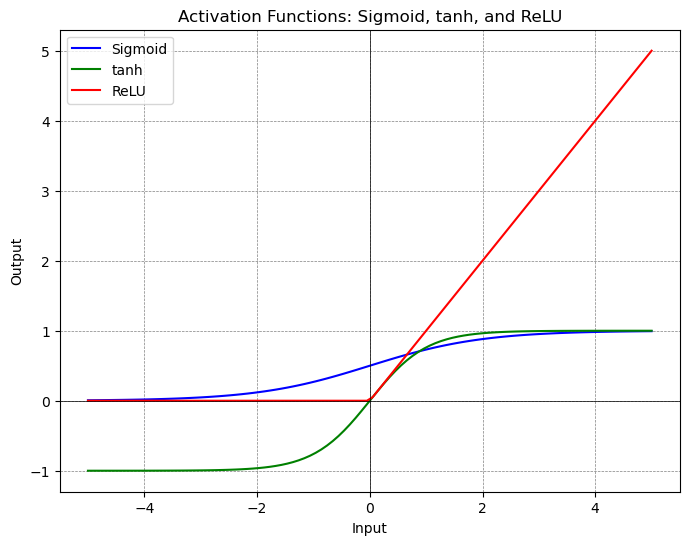

In [12]:
# using the example for sigmoid, plot the representation of
# tanh and ReLu on the same graph. ReLu is defined as:
# ReLu(x) = max(0, x)

import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Generate values for the x-axis
x_values = np.linspace(-5, 5, 100)

# Compute the corresponding y-values for each activation function
y_sigmoid = sigmoid(x_values)
y_tanh = tanh(x_values)
y_relu = relu(x_values)

# Plot the activation functions
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_sigmoid, label='Sigmoid', color='blue')
plt.plot(x_values, y_tanh, label='tanh', color='green')
plt.plot(x_values, y_relu, label='ReLU', color='red')

# Add labels and a legend
plt.title('Activation Functions: Sigmoid, tanh, and ReLU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Show the plot
plt.show()


### Tuning a neural network

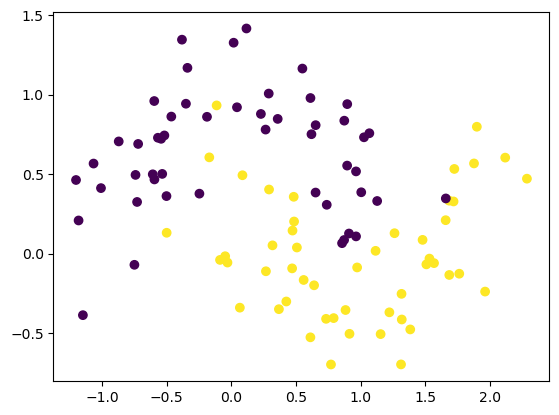

In [31]:
# We use a non linearly separable dataset that looks
# like two moons.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

As you can see, using a linear SVM does not seem to be the best choice. Let's use neural networks to be able to classify this dataset. First, split the data into a training and a test set.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

Train accuracy: 0.96
Test  accuracy: 0.88


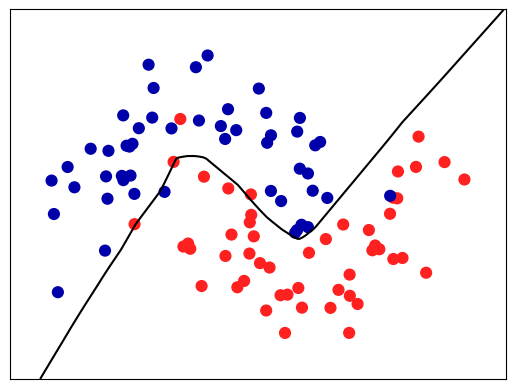

In [33]:
# Create a neural network with all default parameters.
# Compute its accuracy and print its decision boundary.
# Do you think the neural network is good ? Explain why.
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(max_iter=2000)
network.fit(X_train, y_train)
print("Train accuracy:", network.score(X_train, y_train))
print("Test  accuracy:", network.score(X_test, y_test))
plot_2d_separator(network, X, y)
plt.show()

Adam - Train accuracy: 0.96
Adam - Test  accuracy: 0.88


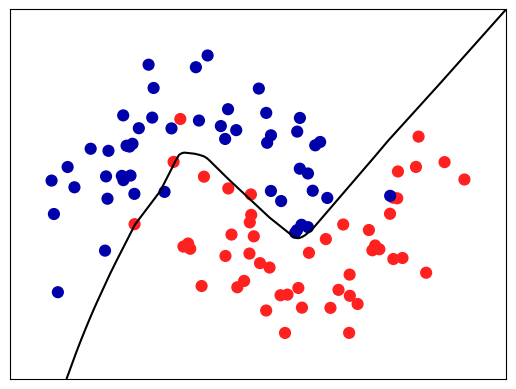

SGD - Train accuracy: 0.8666666666666667
SGD - Test  accuracy: 0.76


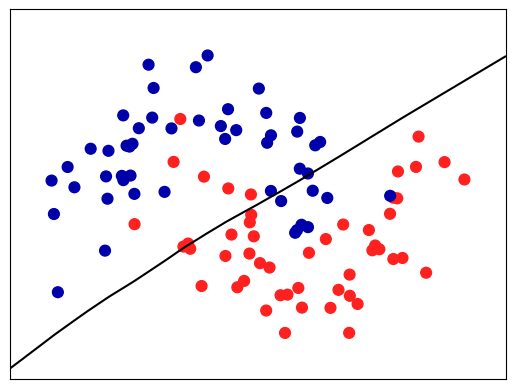

LBFGS - Train accuracy: 1.0
LBFGS - Test  accuracy: 0.88


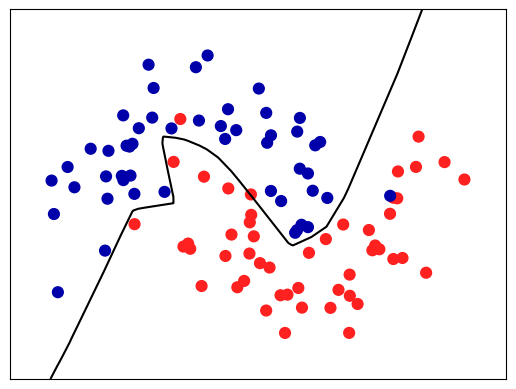

In [34]:
# There exist different algorithms to train a neural
# network. The default one is called 'adam'. Use the
# documentation to know what are the other kind of
# algorithm. Create other networks with each type of
# algorithm. Which one is the best ?
from sklearn.neural_network import MLPClassifier

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Create a neural network with the 'adam' algorithm
network_adam = MLPClassifier(max_iter=2000, solver='adam', random_state=3)
network_adam.fit(X_train, y_train)
print("Adam - Train accuracy:", network_adam.score(X_train, y_train))
print("Adam - Test  accuracy:", network_adam.score(X_test, y_test))
plot_2d_separator(network_adam, X, y)
plt.show()

# Create a neural network with the 'sgd' algorithm
network_sgd = MLPClassifier(max_iter=2000, solver='sgd', random_state=3)
network_sgd.fit(X_train, y_train)
print("SGD - Train accuracy:", network_sgd.score(X_train, y_train))
print("SGD - Test  accuracy:", network_sgd.score(X_test, y_test))
plot_2d_separator(network_sgd, X, y)
plt.show()

# Create a neural network with the 'lbfgs' algorithm
network_lbfgs = MLPClassifier(max_iter=2000, solver='lbfgs', random_state=3)
network_lbfgs.fit(X_train, y_train)
print("LBFGS - Train accuracy:", network_lbfgs.score(X_train, y_train))
print("LBFGS - Test  accuracy:", network_lbfgs.score(X_test, y_test))
plot_2d_separator(network_lbfgs, X, y)
plt.show()




In [35]:
# By default, the neural network has only 1 hidden layer of
# 100 neurons. Use the right parameter to create a network
# of 2 hidden layers, each one having 10 neurons.

# Create other networks with different parameters to see if
# many small layers is better than 1 big layer.
# Create a neural network with 2 hidden layers, each having 10 neurons
nn_two_layers = MLPClassifier(hidden_layer_sizes=(10, 10), solver="adam")
nn_two_layers.fit(X_train, y_train)
print("Two Hidden Layers")
print("  Train accuracy:", nn_two_layers.score(X_train, y_train))
print("  Test  accuracy:", nn_two_layers.score(X_test, y_test))

# Create a neural network with 1 hidden layer of 20 neurons
nn_one_big_layer = MLPClassifier(hidden_layer_sizes=(20,), solver="adam")
nn_one_big_layer.fit(X_train, y_train)
print("One Big Hidden Layer")
print("  Train accuracy:", nn_one_big_layer.score(X_train, y_train))
print("  Test  accuracy:", nn_one_big_layer.score(X_test, y_test))

# Create a neural network with 3 hidden layers, each having 5 neurons
nn_three_layers = MLPClassifier(hidden_layer_sizes=(5, 5, 5), solver="adam")
nn_three_layers.fit(X_train, y_train)
print("Three Hidden Layers")
print("  Train accuracy:", nn_three_layers.score(X_train, y_train))
print("  Test  accuracy:", nn_three_layers.score(X_test, y_test))


C:\Users\Maryam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Maryam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Two Hidden Layers
  Train accuracy: 0.88
  Test  accuracy: 0.76
One Big Hidden Layer
  Train accuracy: 0.88
  Test  accuracy: 0.8
Three Hidden Layers
  Train accuracy: 0.8933333333333333
  Test  accuracy: 0.8


C:\Users\Maryam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# You can also modify the activation function of the
# neurons in your network. Create a network for each type
# of activation. Which one is the best ?
# Create a neural network with the 'logistic' activation function
nn_logistic = MLPClassifier(hidden_layer_sizes=(10, 10), activation="logistic", solver="adam")
nn_logistic.fit(X_train, y_train)
print("Logistic Activation")
print("  Train accuracy:", nn_logistic.score(X_train, y_train))
print("  Test  accuracy:", nn_logistic.score(X_test, y_test))

# Create a neural network with the 'tanh' activation function
nn_tanh = MLPClassifier(hidden_layer_sizes=(10, 10), activation="tanh", solver="adam")
nn_tanh.fit(X_train, y_train)
print("Tanh Activation")
print("  Train accuracy:", nn_tanh.score(X_train, y_train))
print("  Test  accuracy:", nn_tanh.score(X_test, y_test))

# Create a neural network with the 'relu' activation function
nn_relu = MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver="adam")
nn_relu.fit(X_train, y_train)
print("ReLU Activation")
print("  Train accuracy:", nn_relu.score(X_train, y_train))
print("  Test  accuracy:", nn_relu.score(X_test, y_test))


Logistic Activation
  Train accuracy: 0.52
  Test  accuracy: 0.44
Tanh Activation
  Train accuracy: 0.88
  Test  accuracy: 0.8
ReLU Activation
  Train accuracy: 0.84
  Test  accuracy: 0.72


C:\Users\Maryam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Maryam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
